In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<h3> Read Data</h3><br>
The data to be retrieved is defined as a dictionary. We are keen to retrieve the data for Ford (F) and GE (F)

<h3>API - broken</h3>
Since August 1st, 2018, the API no longer returns any data.  We therefore load the prices from a spreadsheet

In [2]:
df_GE = pd.read_excel('../../Data/GE.xlsx')
df_F = pd.read_excel('../../Data/FORD.xlsx')


In [3]:
# print(df_F.tail())

df_F.loc['2018-09-25']

F    9.39
Name: 2018-09-25 00:00:00, dtype: float64

<h3> Create one datastructure </h3>
Consolidate the Data of Ford and GE into one single DataFrame

This is some info

In [4]:
#sjasdlajsldjs
df = pd.concat([df_F,df_GE],axis=1)
df.head()

,F,GE
2007-10-23,NaN,40.48
2007-10-24,NaN,40.23
2007-10-25,NaN,40.16
2007-10-26,NaN,40.38
2007-10-29,NaN,40.56


<b>Task:</b> Remove all the entries where there are missing values.

In [5]:
df.head()

,F,GE
2007-10-23,NaN,40.48
2007-10-24,NaN,40.23
2007-10-25,NaN,40.16
2007-10-26,NaN,40.38
2007-10-29,NaN,40.56


In [6]:
df.dropna(how='any',inplace=True)

<b>Task:</b>What values do you have for Jan8th, 2018 ?

In [7]:
df.loc['2018-01-08',:]

F     13.15
GE    18.28
Name: 2018-01-08 00:00:00, dtype: float64

Calculate the difference between the return of GE and F

In [8]:
df_ret = df.pct_change(periods=1)
df_ret.head()

,F,GE
2010-10-01,NaN,NaN
2010-10-04,0.047308,-0.015892
2010-10-05,0.013240,0.025466
2010-10-06,0.017679,0.023622
2010-10-07,0.006042,0.008876


In [9]:
df_ret['Diff']= df_ret['GE']-df_ret['F']
df_ret['Diff']=df_ret['Diff'].apply(lambda x : np.abs(x))
df_ret.head()

,F,GE,Diff
2010-10-01,NaN,NaN,NaN
2010-10-04,0.047308,-0.015892,0.063201
2010-10-05,0.013240,0.025466,0.012226
2010-10-06,0.017679,0.023622,0.005943
2010-10-07,0.006042,0.008876,0.002833


<h3>Graph</h3>
DataFrames have their own build-in functions

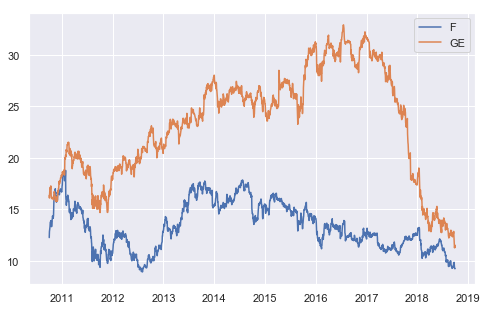

In [10]:
df.plot(figsize=(8,5));

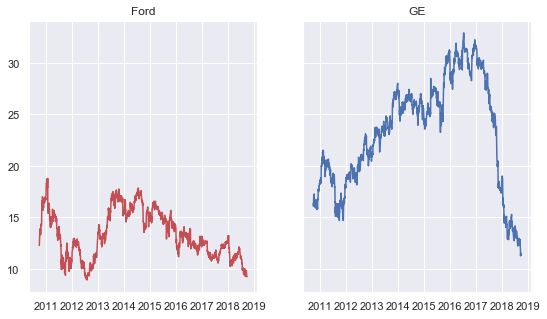

In [11]:
fig , ax = plt.subplots(1,2,figsize=(9,5),sharey=True)
ax[0].plot(df.index,df['F'],'r',label='F')
ax[1].plot(df.index,df['GE'],'b',label='GE')
ax[0].set_title('Ford')
ax[1].set_title('GE');